## Histogram: Most popular clothing materials by item sustainability scores 
- X: material
- y: distribution of scores
- Subquestions: how sustainability scores varies depending on material popularity 
- Textual markers: type of material, names

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in Brand Items & Materials

In [2]:
scraped_princess_polly = [{'item': 'Lydie cargo mini skirt beige', 'cotton': '100'},
 {'item': 'Back in time top white', 'reclaimed nylon': '86', 'elastane': '14'},
 {'item': 'Xena denim shorts', 'reclaimed cotton': '40', 'cotton': '60'},
 {'item': 'Janea bikini bottoms rust', 'nylon': '85', 'spandex': '15'},
 {'item': 'Janea bikini top rust', 'nylon': '85', 'spandex': '15'},
 {'item': 'Kier oversized jacket denim mid wash', 'cotton': '100'},
 {'item': 'Iconic cargo mini skirt white', 'cotton': '100'},
 {'item': 'Layla high cut cheeky bikini bottoms navy',
  'polyester': '94',
  'elastane': '6'},
 {'item': 'Callie faux leather jacket black', 'polyester': '55', 'pu': '45'},
 {'item': 'Jenner triangle bikini top deep purple',
  'reclaimed nylon': '80',
  'elastane': '20'}]

scraped_princess_polly = pd.DataFrame(scraped_princess_polly)
scraped_princess_polly.head(5)

,item,cotton,reclaimed nylon,elastane,reclaimed cotton,nylon,spandex,polyester,pu
0,Lydie cargo mini skirt beige,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Back in time top white,NaN,86,14,NaN,NaN,NaN,NaN,NaN
2,Xena denim shorts,60,NaN,NaN,40,NaN,NaN,NaN,NaN
3,Janea bikini bottoms rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN
4,Janea bikini top rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN


In [3]:
scraped_data_shein = [{'item': 'SHEIN LUNE Women Floral Print Wide Leg Spring/Summer Casual And Elegant Trouser Beach Pants',
  'polyester': '95', 'elastane': '5'},
 {'item': 'Pattern Printed Casual Round Neck T-Shirt', 'polyester': '100'},
 {'item': "SHEIN LUNE Women's Floral Embroidered Sheer Mesh Open Front Jacket",
  'polyester': '100'},
 {'item': 'SHEIN Maternity 2pcs/Set Casual Loose Round Neck T-Shirt With Elastic Waistband Shorts',
  'polyester': '96',
  'elastane': '4'},
 {'item': 'Hollow Out Knit Crop Sweater With Bell Sleeve', 'acrylic': '100'},
 {'item': 'ROMWE Fairycore Spring Summer Elegant Floral Print Mermaid Mesh Maxi Skirt',
  'polyester': '95', 'elastane': '5'},
 {'item': "SHEIN LUNE Women's Vacation Style Allover Print Dress With Full Dress And Slit, Strapless",
  'polyester': '100'},
 {'item': 'SHEIN Clasi Floral Print Tie Neck Flutter Sleeve Ruffle Hem Dress',
  'polyester': '100'},
 {'item': "ADYCE Women's One Shoulder Pleated High Slit Cocktail Party Dress For Dancing Gala Dress",
  'polyester': '95',
  'elastane': '5'},
 {'item': 'SHEIN Privé Solid Color Suit Set', 'polyester': '100'}]

scraped_data_shein = pd.DataFrame(scraped_data_shein)
scraped_data_shein.head(5)

,item,polyester,elastane,acrylic
0,SHEIN LUNE Women Floral Print Wide Leg Spring/...,95,5,NaN
1,Pattern Printed Casual Round Neck T-Shirt,100,NaN,NaN
2,SHEIN LUNE Women's Floral Embroidered Sheer Me...,100,NaN,NaN
3,SHEIN Maternity 2pcs/Set Casual Loose Round Ne...,96,4,NaN
4,Hollow Out Knit Crop Sweater With Bell Sleeve,NaN,NaN,100


In [4]:
scraped_data_abercrombie = [{'item': 'Curve Love High Rise Dad Short', 'cotton': 99, 'elastane': 1},
 {'item': 'The A&F Scarlett Linen-Blend Wrap Mini Skort',
  'linen': 55,
  'viscose': 45},
 {'item': 'High Rise 4" Mom Short', 'cotton': 99, 'elastane': 1},
 {'item': 'Curve Love High Rise 4" Mom Short', 'cotton': 99, 'elastane': 1},
 {'item': 'The A&F Scarlett Linen-Blend Mini Skort',
  'linen': 55,
  'viscose': 45},
 {'item': 'A&F Sloane Tailored Pant',
  'polyester': 80,
  'viscose': 16,
  'elastane': 4},
 {'item': 'Curve Love High Rise 4" Mom Short', 'cotton': 99, 'elastane': 1},
 {'item': 'High Rise 4" Mom Short', 'cotton': 99, 'elastane': 1},
 {'item': 'Curve Love High Rise Dad Short', 'cotton': 99, 'elastane': 1},
 {'item': 'Curve Love High Rise 90s Cutoff Short',
  'cotton': 99,
  'elastane': 1}]

scraped_data_abercrombie = pd.DataFrame(scraped_data_abercrombie)
scraped_data_abercrombie.head(5)

,item,cotton,elastane,linen,viscose,polyester
0,Curve Love High Rise Dad Short,99.0,1.0,NaN,NaN,NaN
1,The A&F Scarlett Linen-Blend Wrap Mini Skort,NaN,NaN,55.0,45.0,NaN
2,"High Rise 4"" Mom Short",99.0,1.0,NaN,NaN,NaN
3,"Curve Love High Rise 4"" Mom Short",99.0,1.0,NaN,NaN,NaN
4,The A&F Scarlett Linen-Blend Mini Skort,NaN,NaN,55.0,45.0,NaN


In [5]:
scraped_data_aritzia = [{'item': 'Pleated Mid-Thigh Short',
  'recycled polyester': 61,
  'lenzing ecovero viscose': 26,
  'cotton': 7,
  'elastane': 6},
 {'item': 'Eyecatcher Mini Dress', 'polyester': 95, 'elastane': 5},
 {'item': 'Contour Crew Cropped T-Shirt',
  'nylon': '94', 'elastane': 6},
 {'item': 'Pleated Mini Short',
  'recyled polyester': 61, 'lenzing ecovero viscose': 26, 'cotton': 7, 'elastane': 6},
 {'item': 'Eyecatcher Dress', 'polyester': 95, 'elastane': 5},
 {'item': 'Contour Flourish Top', 'nylon': 94, 'elastane': 6},
 {'item': 'Resolution Dress', 'triacetate': 82, 'polyester': 18},
 {'item': 'Bureau Pant', 'wool': 95, 'elastane': 5, 'polyester': 100},
 {'item': 'Tuberose Dress', 'recycled polyester': 100},
 {'item': 'Lodge Linen Pant', 'tencel lyocell': 66, 'linen': 34}]

scraped_data_aritzia = pd.DataFrame(scraped_data_aritzia)
scraped_data_aritzia.head(5)

,item,recycled polyester,lenzing ecovero viscose,cotton,elastane,polyester,nylon,recyled polyester,triacetate,wool,tencel lyocell,linen
0,Pleated Mid-Thigh Short,61.0,26.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eyecatcher Mini Dress,NaN,NaN,NaN,5.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Contour Crew Cropped T-Shirt,NaN,NaN,NaN,6.0,NaN,94,NaN,NaN,NaN,NaN,NaN
3,Pleated Mini Short,NaN,26.0,7.0,6.0,NaN,NaN,61.0,NaN,NaN,NaN,NaN
4,Eyecatcher Dress,NaN,NaN,NaN,5.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
scraped_data_uniqlo = [{'item': 'U AIRism Cotton Oversized Crew Neck Half-Sleeve T-Shirt',
  'cotton': 53,
  'polyester': 17,
  'recycled polyester': 30},
 {'item': 'Ribbed Cropped Sleeveless Bra Top',
  'cotton': 97,
  'spandex': 3},
 {'item': 'U Crew Neck T-Shirt', 'cotton': 100},
 {'item': 'Mini Short Sleeve T-Shirt', 'cotton': 96, 'spandex': 4},
 {'item': 'Premium Linen Long Sleeve Shirt', 'linen': 100},
 {'item': 'Ultra Stretch AIRism Cropped T-Shirt',
  'recycled polyester': 77,
  'spandex': 23,},
 {'item': 'Star Wars: Remastered by Kosuke Kawamura UT (Short-Sleeve Graphic T-Shirt)',
  'cotton': 75,
  'recycled cotton': 25},
 {'item': 'AIRism Cropped Bra Tube Top',
  'cotton': 53,
  'nylon': 37,
  'spandex': 10},
 {'item': 'Washable Knit Ribbed Long-Sleeve Cardigan',
  'rayon': 53,
  'polyester': 24,
  'nylon': 23},
 {'item': 'Washable Knit Ribbed Pants',
  'rayon': 53,
  'polyester': 24,
  'nylon': 23}]

scraped_data_uniqlo = pd.DataFrame(scraped_data_uniqlo)
scraped_data_uniqlo.head(5)

,item,cotton,polyester,recycled polyester,spandex,linen,recycled cotton,nylon,rayon
0,U AIRism Cotton Oversized Crew Neck Half-Sleev...,53.0,17.0,30.0,NaN,NaN,NaN,NaN,NaN
1,Ribbed Cropped Sleeveless Bra Top,97.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2,U Crew Neck T-Shirt,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mini Short Sleeve T-Shirt,96.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4,Premium Linen Long Sleeve Shirt,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


In [7]:
scraped_data_skims = [{'item': 'Cotton Jersey T Shirt Light Heather Grey',
  'cotton': '90',
  'spandex': '10'},
 {'item': 'Soft Smoothing Seamless T Shirt Onyx',
  'nylon': '93',
  'spandex': '7'},
 {'item': 'Soft Lounge Tank Onyx', 'modal': '91', 'spandex': '9'},
 {'item': 'Boyfriend Long Sleeve T Shirt Onyx',
  'cotton': '47',
  'modal': '48',
  'spandex': '5'},
 {'item': 'Soft Lounge Long Slip Dress Onyx', 'modal': '91', 'spandex': '9'},
 {'item': 'Fits Everybody Scoop Bralette Onyx',
  'polyamide': '76',
  'elastane': '24'},
 {'item': 'Fits Everybody Scoop Bralette Onyx', 'polyamide': 76, 'elastane': 24},
 {'item': 'Essential Long Sleeve Scoop Neck Bodysuit Onyx',
  'nylon': '95',
  'spandex': '5'},
 {'item': 'Essential Crew Neck Long Sleeve Bodysuit Onyx',
  'nylon': '95',
  'spandex': '5'},
 {'item': 'Signature Swim Dipped Tie Bottom Onyx',
  'recycled nylon': '76',
  'spandex': '24'}]

scraped_data_skims = pd.DataFrame(scraped_data_skims)
scraped_data_skims.head(5)

,item,cotton,spandex,nylon,modal,polyamide,elastane,recycled nylon
0,Cotton Jersey T Shirt Light Heather Grey,90,10,NaN,NaN,NaN,NaN,NaN
1,Soft Smoothing Seamless T Shirt Onyx,NaN,7,93,NaN,NaN,NaN,NaN
2,Soft Lounge Tank Onyx,NaN,9,NaN,91,NaN,NaN,NaN
3,Boyfriend Long Sleeve T Shirt Onyx,47,5,NaN,48,NaN,NaN,NaN
4,Soft Lounge Long Slip Dress Onyx,NaN,9,NaN,91,NaN,NaN,NaN


In [8]:
scraped_data_brandy = [{'item': 'Anastasia Sweatpants', 'cotton': 100},
 {'item': 'Rosa Sweatpants', 'cotton': 82, 'polyester': 18},
 {'item': 'Beyonca Crop Tank', 'cotton': 100},
 {'item': 'Priscilla Pants', 'cotton': 96, 'elastane': 4},
 {'item': 'Christy Hoodie', 'cotton': 70, 'polyester': 30},
 {'item': 'Bella Top', 'cotton': 100},
 {'item': 'Brianna Cotton Thick Stripe Sweater', 'cotton': 100},
 {'item': 'Boy Short Heart Underwear', 'cotton': 96, 'elastane': 4},
 {'item': 'Bonnie Top', 'cotton': 96, 'elastane': 4},
 {'item': 'Lydia Tank', 'cotton': 96, 'elastane': 4}]

scraped_data_brandy = pd.DataFrame(scraped_data_brandy)
scraped_data_brandy.head(5)

,item,cotton,polyester,elastane
0,Anastasia Sweatpants,100,NaN,NaN
1,Rosa Sweatpants,82,18.0,NaN
2,Beyonca Crop Tank,100,NaN,NaN
3,Priscilla Pants,96,NaN,4.0
4,Christy Hoodie,70,30.0,NaN


In [9]:
scraped_data_f21 = [{'item': 'Crochet Hello Kitty Midi Dress', 'rayon': 79, 'nylon': 21},
 {'item': 'Sequin Hello Kitty Mesh Tee', 'cotton': 100},
 {'item': 'Rhinestone Badtz-Maru Graphic Tee', 'cotton': 93, 'spandex': 7},
 {'item': 'Hello Kitty Ringer Shorts', 'rayon': 80, 'polyester': 20},
 {'item': 'Striped Hello Kitty Shorts', 'rayon': 80, 'polyester': 20},
 {'item': 'Floral Off-the-Shoulder Midi Dress', 'viscose': 100},
 {'item': 'Tiered Sweetheart Maxi Dress', 'polyester': 100},
 {'item': 'Tube Mini Dress',
   'rayon': 86,
   'linen': 11,
   'spandex': 2,
   'other': 1},
 {'item': 'Stretch-Denim Notched Vest', 'polyester': 100},
 {'item': 'Denim Button-Up Crop Top',
   'cotton': 65,
   'polyester': 33,
   'spandex': 2}]

scraped_data_f21 = pd.DataFrame(scraped_data_f21)
scraped_data_f21.head(5)

,item,rayon,nylon,cotton,spandex,polyester,viscose,linen,other
0,Crochet Hello Kitty Midi Dress,79.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Sequin Hello Kitty Mesh Tee,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2,Rhinestone Badtz-Maru Graphic Tee,NaN,NaN,93.0,7.0,NaN,NaN,NaN,NaN
3,Hello Kitty Ringer Shorts,80.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN
4,Striped Hello Kitty Shorts,80.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN


In [10]:
scraped_data_alo = [{'item': 'Airlift Ribbed Jump Start V-Neck Bra',
  'polyester': 82,
  'elastane': 18},
 {'item': '7/8 High-Waist Airlift Legging', 'polyester': 82, 'elastane': 18},
 {'item': 'Alosoft Crop Finesse Short Sleeve',
  'polyester': 87,
  'elastane': 13},
 {'item': 'Airbrush High-Waist 5" Biker Short', 'nylon': 87, 'elastane': 13},
 {'item': 'Airlift Intrigue Bra', 'polyester': 82, 'elastane': 18},
 {'item': 'Alosoft Backspin Dress', 'polyester': 87, 'elastane': 13},
 {'item': '3" High-Waist Airlift Short', 'polyester': 82, 'elastane': 18},
 {'item': 'Accolade Straight Leg Sweatpant', 'cotton': 65, 'polyester': 35},
 {'item': 'Match Point Tennis Skirt', 'polyester': 92, 'spandex': 8},
 {'item': 'Accolade Crew Neck Pullover', 'cotton': 65, 'polyester': 35}]

scraped_data_alo = pd.DataFrame(scraped_data_alo)
scraped_data_alo.head(5)

,item,polyester,elastane,nylon,cotton,spandex
0,Airlift Ribbed Jump Start V-Neck Bra,82.0,18.0,NaN,NaN,NaN
1,7/8 High-Waist Airlift Legging,82.0,18.0,NaN,NaN,NaN
2,Alosoft Crop Finesse Short Sleeve,87.0,13.0,NaN,NaN,NaN
3,"Airbrush High-Waist 5"" Biker Short",NaN,13.0,87.0,NaN,NaN
4,Airlift Intrigue Bra,82.0,18.0,NaN,NaN,NaN


In [11]:
scraped_data_boohoo = [
 {'item': 'Crochet Contrast Scallop Scoop Beach Dress', 'polyacrylic': 100},
 {'item': 'Text Print Hooded Short Tracksuit',
   'polyester': 50,
   'cotton': 50},
 {'item': 'Mesh Square Neck Ruched Midi Dress', 'polyester': 100},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Essentials Split Leg Maxi Beach Skirt', 'polyester': 100},
 {'item': 'Puff One Shoulder Side Split Maxi Dress', 'polyester': 100},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Plus Basic Plunge Rib Bodysuit', 'polyester': 95, 'elastane': 5},
 {'item': 'Maternity Strappy Cowl Neck Dress And Duster Coat',
   'polyester': 95,
   'elastane': 5}]

scraped_data_boohoo = pd.DataFrame(scraped_data_boohoo)
scraped_data_boohoo.head(5)

,item,polyacrylic,polyester,cotton,elastane
0,Crochet Contrast Scallop Scoop Beach Dress,100.0,NaN,NaN,NaN
1,Text Print Hooded Short Tracksuit,NaN,50.0,50.0,NaN
2,Mesh Square Neck Ruched Midi Dress,NaN,100.0,NaN,NaN
3,Recycled Oversized Sweater Joggers,NaN,30.0,70.0,NaN
4,Essentials Split Leg Maxi Beach Skirt,NaN,100.0,NaN,NaN


#### Combine data and determine most popular clothing materials

In [12]:
# combine dataframes
item_materials = pd.concat([scraped_princess_polly, scraped_data_shein, scraped_data_alo, scraped_data_abercrombie,
                           scraped_data_aritzia, scraped_data_boohoo, scraped_data_brandy, scraped_data_skims, 
                           scraped_data_uniqlo, scraped_data_f21])

item_materials.head(5)

,item,cotton,reclaimed nylon,elastane,reclaimed cotton,nylon,spandex,polyester,pu,acrylic,...,triacetate,wool,tencel lyocell,polyacrylic,modal,polyamide,recycled nylon,recycled cotton,rayon,other
0,Lydie cargo mini skirt beige,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Back in time top white,NaN,86,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xena denim shorts,60,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Janea bikini bottoms rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Janea bikini top rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# count number of materials
top_5 = dict(item_materials.drop(columns=['item']).count().sort_values(ascending = False)[0:5])
top_5

{'polyester': 44, 'cotton': 40, 'elastane': 37, 'spandex': 18, 'nylon': 12}

#### Calculate clothing material scores 

In [16]:
# read in scores 
item_material_scores = pd.read_csv("100_items_data.csv").drop(columns=['Unnamed: 0'])
item_material_scores.head()

,brand,total_ratings,item,score
0,Princess Polly,2.0,Lydie Cargo Mini Skirt Beige,1.666667
1,Princess Polly,2.0,Back In Time Top White,3.100000
2,Princess Polly,2.0,Xena Denim Shorts,3.000000
3,Princess Polly,2.0,Janea Bikini Bottoms Rust,1.666667
4,Princess Polly,2.0,Janea Bikini Top Rust,1.666667


In [17]:
# normalize item names
item_materials['item'] = item_materials['item'].str.lower()
item_material_scores['item'] = item_material_scores['item'].str.lower()

item_material_scores.head(5)

,brand,total_ratings,item,score
0,Princess Polly,2.0,lydie cargo mini skirt beige,1.666667
1,Princess Polly,2.0,back in time top white,3.100000
2,Princess Polly,2.0,xena denim shorts,3.000000
3,Princess Polly,2.0,janea bikini bottoms rust,1.666667
4,Princess Polly,2.0,janea bikini top rust,1.666667


In [18]:
# join dataframes
materials_ratings = pd.merge(item_materials, item_material_scores, on='item', how='outer')
print(materials_ratings.shape)
materials_ratings.head()

(113, 28)


,item,cotton,reclaimed nylon,elastane,reclaimed cotton,nylon,spandex,polyester,pu,acrylic,...,polyacrylic,modal,polyamide,recycled nylon,recycled cotton,rayon,other,brand,total_ratings,score
0,lydie cargo mini skirt beige,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Princess Polly,2.0,1.666667
1,back in time top white,NaN,86,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Princess Polly,2.0,3.100000
2,xena denim shorts,60,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Princess Polly,2.0,3.000000
3,janea bikini bottoms rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Princess Polly,2.0,1.666667
4,janea bikini top rust,NaN,NaN,NaN,NaN,85,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Princess Polly,2.0,1.666667


In [19]:
# get material scores for the most popular materials
polyester_rows = materials_ratings[materials_ratings['polyester'].notnull()]
polyester_scores = list(polyester_rows['score'])

cotton_rows = materials_ratings[materials_ratings['cotton'].notnull()]
cotton_scores = list(cotton_rows['score'])

elastane_rows = materials_ratings[materials_ratings['elastane'].notnull()]
elastane_scores = list(elastane_rows['score'])

spandex_rows = materials_ratings[materials_ratings['spandex'].notnull()]
spandex_scores = list(spandex_rows['score'])

nylon_rows = materials_ratings[materials_ratings['nylon'].notnull()]
nylon_scores = list(nylon_rows['score'])

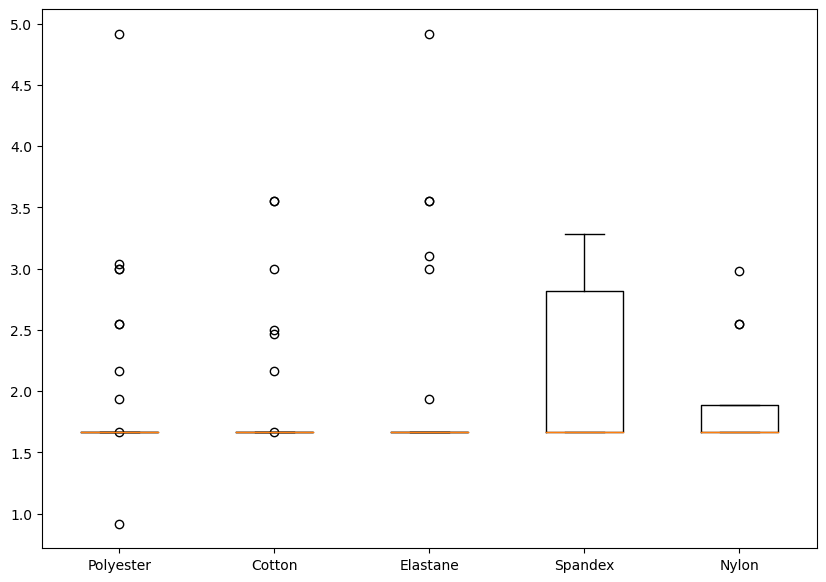

In [20]:
# box plot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()
bp = ax.boxplot([polyester_scores, cotton_scores, elastane_scores, spandex_scores, nylon_scores])
ax.set_xticklabels(['Polyester', 'Cotton', 'Elastane', 'Spandex', 'Nylon'])
ax.get_xaxis().tick_bottom()
plt.show()

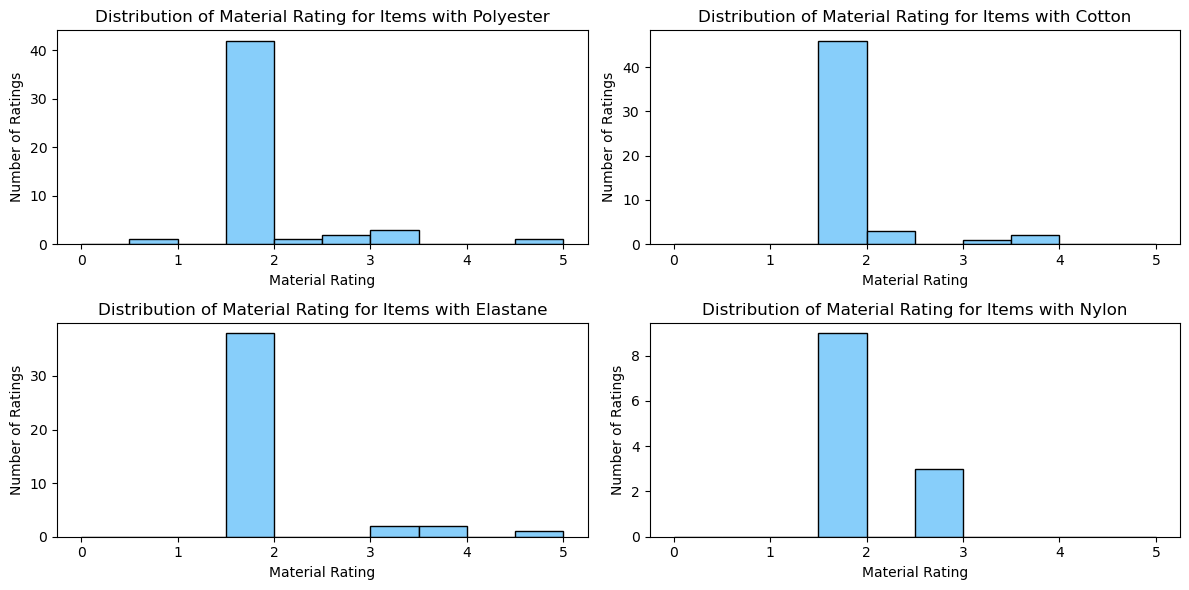

In [21]:
# histogram 
material_scores = [polyester_scores, cotton_scores, elastane_scores, nylon_scores]
material_names = ['Polyester', 'Cotton', 'Elastane', 'Nylon']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

for scores, material, ax in zip(material_scores, material_names, axes.ravel()):
    ax.hist(scores, bins=10, color='lightskyblue', edgecolor='black', range=[0,5])
    ax.set_title('Distribution of Material Rating for Items with ' + material)
    ax.set_ylabel('Number of Ratings')
    ax.set_xlabel('Material Rating')


# adjusting layout for better spacing
plt.tight_layout()

# display figure
plt.show()